# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [38]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

# Create two new dataframes
data_north = pd.read_csv("NorthCallCenter.csv")
data_south = pd.read_csv("SouthCallCenter.csv")

data_north.head()
data_south.head(20)



,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
5,5,South,Sales Support,1:00 PM,Incoming,D,Karl,NO,0,0,9,1,1.0,4,1
6,6,South,Product Support,11:00 AM,Incoming,C,Sandy,NO,0,0,8,1,1.0,2,1
7,7,South,Product Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,1,1.0,3,1
8,8,South,Product Support,2:00 PM,Incoming,D,Randy,NO,0,0,11,2,1.0,4,1
9,9,South,Product Support,3:00 PM,Incoming,D,George,NO,0,0,8,3,1.0,4,1


## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [39]:
# EDA Question 1A solution below:

data_north['Rep ID'].count()

# According to the output from the count function, there are approximately 
# 245 reps in the North branch


np.int64(245)

#### EDA Question 1B:  How many reps are in the South branch?  

In [40]:
# EDA Question 1B solution Below:

data_south['Rep ID'].count()

# According to the outputs of the count function, there
# are approximately 314 representatives in the South branch

np.int64(314)

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [41]:
# EDA Question 2A solution Below:

# I want wait time for busy, not ready, and incoming wait for North branch on an average

north_avg_wait_times = data_north[
    [
        "Busy Minutes",
        "Not Ready Minutes",
        "Incoming Wait Time",
        "During Call Wait Time"
    ]
].mean()

north_avg_wait_times

Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [42]:
# EDA Question 2B solution Below:

south_avg_wait_times = data_south[
    [
        "Busy Minutes",
        "Not Ready Minutes",
        "Incoming Wait Time",
        "During Call Wait Time"
    ]
].mean()

south_avg_wait_times

Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?



In [43]:
# EDA Question 3 solution Below:

# I want a one row per time block showing call count over north and south branches

data_north["Branch"] = "North"
data_south["Branch"] = "South"

# Q3: Number of calls taken for each time block (North + South combined)

# (Optional but recommended) add a Branch label so you can still split later if needed
data_north["Branch"] = "North"
data_south["Branch"] = "South"

# combine the datasets
combined_df = pd.concat([data_north, data_south], ignore_index=True)

# format
combined_df["Time Block"] = pd.to_datetime(combined_df["Time Block"], format="%I:%M %p")

# count the calls
calls_by_timeblock = (
    combined_df
    .groupby("Time Block")
    .size()
    .sort_index()
)

calls_by_timeblock


Time Block
1900-01-01 09:00:00     10
1900-01-01 10:00:00     99
1900-01-01 11:00:00     56
1900-01-01 12:00:00    120
1900-01-01 13:00:00     40
1900-01-01 14:00:00     65
1900-01-01 15:00:00     73
1900-01-01 16:00:00     53
1900-01-01 17:00:00     43
dtype: int64

##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 245
- 1b) Reps in the South Branch = 314


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.98
> - Not Ready Minutes = 1.91 
> - Incoming Wait Time = 3.04
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.50
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [44]:
# Question 1 solution below

data_south.isnull().sum()
data_north.isnull().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64

#### Record your answer below:

> Your Answer: There is 188 missing values in the Incoming Wait Time. # There is 163 missing values in the Incoming Wait Time. The missing values can either be filled with 0 when necessary or excluded when analyzing wait behavior

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [45]:
# Cleaning Question 2 solution below:

data_north["Sale"].unique()

data_north["Sale"] = (
    data_north["Sale"]
    .str.strip()      
    .str.upper()      
)

data_north["Sale"].unique()

array(['NO', 'YES'], dtype=object)

##### Record your answer by below:
> Your Answer: More than likely the data was entered manually which caused inconsistent formatting. To rectify the issue I ran the strip and upper functions. This stripped the whitespace and ensured consistency for accurate filtering.

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [46]:
# Cleaning Question 3 solution below:

data_north.duplicated().sum()

data_south.duplicated().sum()

np.int64(0)

##### Record your answer below:
> Your Answer: There are no duplicated values

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [47]:
# Cleaning Question 4 solution below:

data_north.columns
data_south.columns

data_north = data_north.drop(columns=["Unnamed: 0"])
data_south = data_south.drop(columns=["Unnamed: 0"])

data_north
data_south

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


##### Record your answer below:
> Your Answer: An unnamed column was created in both datasets as a result of indexing when saving the CSV files.
Once created, they were reloaded as a regular column. I ran a drop function to remove the unnecessary data.

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [48]:
# Create dataframe for the entire company named df

df = pd.concat([data_north, data_south], ignore_index=True)

df

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
555,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
556,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
557,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [49]:
# Manipulation Question solution below:

# I want one row per branch and rep, showing total calls handled.

call_counts_by_rep = (
    df
    .groupby(["Branch", "Rep ID"])
    .size()
    .reset_index(name="Rep Call Counts")
)

sorted_df = call_counts_by_rep.sort_values(
    by=["Branch", "Rep Call Counts"],
    ascending=[True, False]
)

sorted_df = sorted_df.reset_index(drop=True)

sorted_df

,Branch,Rep ID,Rep Call Counts
0,North,Brent,37
1,North,Lilly,30
2,North,Duke,29
3,North,Todd,29
4,North,Joe,26
5,North,Cam,24
6,North,Xander,24
7,North,Amanda,23
8,North,Andy,23
9,South,Eric,35


##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent
- South Branch = Eric

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [50]:
# Manipulation Question 2 solution below:

# The metric: call abandonment rate // There is an abandonment column 
# Who: North branch, South branch, whole company // North, South = whole ompany?
# The comparison: across each branch and within the entire company
# How would I know the answer once I see it: 
    # average call abandonment rate per branch and as a whole
    # outliers: in 2-5% range // above? // below?

# Create dataframe for the entire company named df

total_calls_company = len(df)
total_calls_company

df["Abandoned"].value_counts(dropna=False)

abandon_rate_company = df["Abandoned"].mean()
abandon_rate_company

abandon_rate_company_pct = abandon_rate_company * 100
abandon_rate_company_pct

abandon_rate_by_company_df = pd.DataFrame({
    "Branch": ["Company"],
    "Abandonment Rate (%)": [abandon_rate_company_pct]
})
abandon_rate_by_company_df

abandon_rate_by_branch = df.groupby("Branch")["Abandoned"].mean()
abandon_rate_by_branch

abandon_rate_by_branch_pct = abandon_rate_by_branch * 100
abandon_rate_by_branch_pct

abandon_rate_by_branch_df = abandon_rate_by_branch_pct.reset_index(name="Abandonment Rate (%)")
abandon_rate_by_branch_df

combined_rate_df = pd.concat([abandon_rate_by_company_df, abandon_rate_by_branch_df], ignore_index=True)
combined_rate_df


,Branch,Abandonment Rate (%)
0,Company,1.967800
1,North,2.857143
2,South,1.273885


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.85
- South Branch = 1.27
- Company Wide = 1.97
- Do any of these fall out of the optimal range of 2-5%? Both South branch, and the company wide rates fall out of range.

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [51]:
# Manipulation Question 3 solution below:

# The metric: service level // There is no service level column
# Who: North branch, South branch, whole company
# The comparison: % of calls within 2sec across each branch and within the entire company
# How would I know the answer once I see it: 
    # percentage of calls per branch and as a whole
    # outliers: in 2 second range // above? // below?

service_level_by_branch = (
    df.groupby("Branch")
      .apply(lambda x: (x["Incoming Wait Time"] <= 2).mean())
)

service_level_by_branch_pct = service_level_by_branch * 100
service_level_by_branch_pct

service_level_company = (df["Incoming Wait Time"] <= 2).mean() * 100
service_level_company

service_level_company_df = pd.DataFrame({
    "Branch": ["Company"],
    "Service Level (%)": [service_level_company]
})

service_level_by_branch_df = service_level_by_branch_pct.reset_index()
service_level_by_branch_df.columns = ["Branch", "Service Level (%)"]

service_level_combined_df = pd.concat(
    [service_level_company_df, service_level_by_branch_df],
    ignore_index=True
)

service_level_combined_df


/var/folders/ml/pkr27nwj14j_z_0bgf5tf4x40000gn/T/ipykernel_4364/636752022.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x["Incoming Wait Time"] <= 2).mean())


,Branch,Service Level (%)
0,Company,14.490161
1,North,13.469388
2,South,15.286624


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 13.47
- South Branch = 15.29
- Company Wide = 14.49

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [52]:
# Manipulation Question 4 solution below:

# The metric: average answer speed
# Who: North branch, South branch, whole company
# The comparison: average amount of speed reps take per branch and overall
# How would I know the answer once I see it: 
    # decimal amounts

# Need Incoming wait time

df.columns = df.columns.str.strip()

df["Incoming Wait Time"] = pd.to_numeric(df["Incoming Wait Time"], errors="coerce")

df["Incoming Wait Time"].dtype
df["Incoming Wait Time"].isna().sum()

avg_speed_per_branch = (
    df
    .groupby("Branch")["Incoming Wait Time"]
    .mean()
)
avg_speed_per_branch

avg_speed_company = df["Incoming Wait Time"].mean()
avg_speed_company

avg_speed_per_branch_df = avg_speed_per_branch.reset_index(name="Avg Speed of Answer (sec)")

avg_speed_company_df = pd.DataFrame({
    "Branch": ["Company"],
    "Avg Speed of Answer (sec)": [avg_speed_company]
})

avg_speed_combined_df = pd.concat(
    [avg_speed_company_df, avg_speed_per_branch_df],
    ignore_index=True
)

avg_speed_combined_df

,Branch,Avg Speed of Answer (sec)
0,Company,3.019231
1,North,3.048780
2,South,3.000000


##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.00
- Company Wide in seconds = 3.02

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

/var/folders/ml/pkr27nwj14j_z_0bgf5tf4x40000gn/T/ipykernel_4364/1705556408.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]


Text(0, 0.5, 'Abandonment Rate (%)')

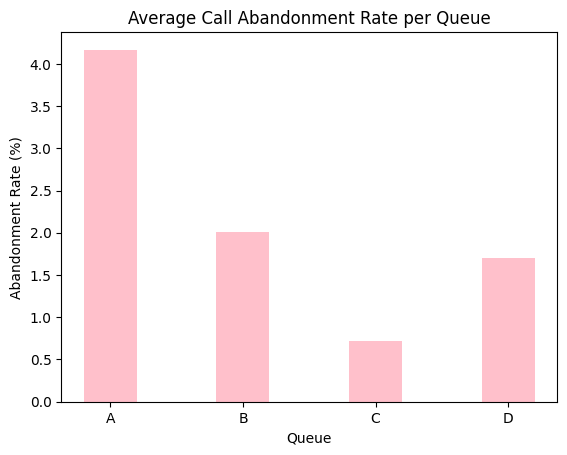

In [53]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import pandas as pd
import matplotlib.pyplot as plt

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 
abandonment_rates

#Your code below:
abandonment_df = pd.DataFrame(
    abandonment_rates.items(),
    columns=["Queue", "Abandonment Rate"]
)
abandonment_df["Abandonment Rate (%)"] = abandonment_df["Abandonment Rate"] * 100
abandonment_df

# Extract keys and values
queues = abandonment_rates.keys()
rates = [rate * 100 for rate in abandonment_rates.values()]  # convert to %

plt.bar(x=queues, height=rates, width=0.4, color="pink")

plt.title("Average Call Abandonment Rate per Queue")
plt.xlabel("Queue")
plt.ylabel("Abandonment Rate (%)")

##### Record your answer below:

> Chart style you chose and why: I chose a bar chart because it easily compares abandonment rates across queues

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

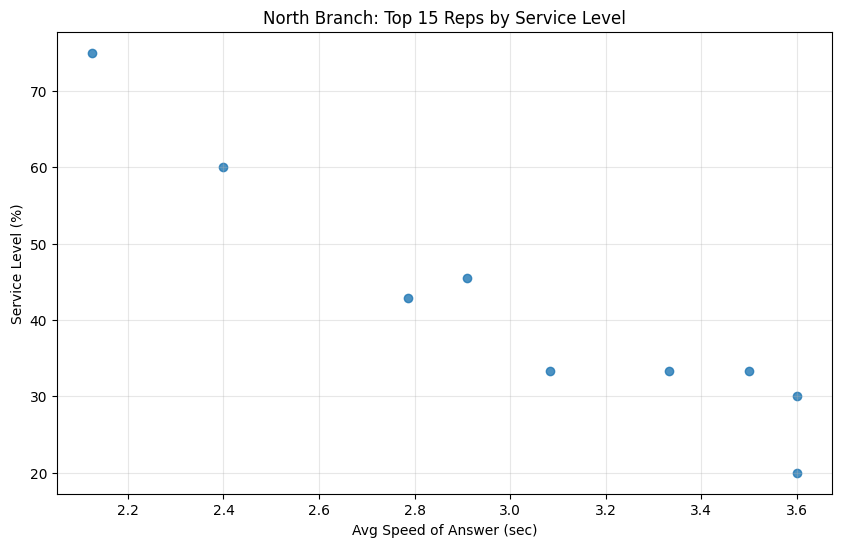

In [62]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep
north = df[df["Branch"] == "North"]
north_plt = north.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: calls <= 2 seconds grouped by Rep
quick_calls = north[north["Incoming Wait Time"] <= 2.0]
quick_stats = quick_calls.groupby("Rep ID")["Calls"].sum().reset_index(name="Calls_<=2s")

# Table 2: total incoming calls grouped by Rep
total_calls_in = north[north["Incoming or Outgoing"] == "Incoming"]
total_stats = total_calls_in.groupby("Rep ID")["Calls"].sum().reset_index(name="Total Incoming Calls")

# Table 3: merge + compute service level %
service_level = pd.merge(quick_stats, total_stats, on="Rep ID", how="inner")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_<=2s"] / service_level["Total Incoming Calls"] * 100

#Your Code Here:

service_level = service_level.rename(columns={
    "Calls_x": "Calls_<=2s",
    "Calls_y": "Total Incoming Calls"
})[["Rep ID", "Calls_<=2s", "Total Incoming Calls", "Service Level %"]]

north_viz = pd.merge(
    north_plt,
    service_level[["Rep ID", "Service Level %"]],
    on="Rep ID",
    how="inner"
)

north_viz = north_viz.rename(columns={"Incoming Wait Time": "Avg Speed of Answer (sec)"})
north_viz.head()

top15 = north_viz.sort_values("Service Level %", ascending=False).head(15)

plt.figure(figsize=(10,6))
plt.scatter(
    top15["Avg Speed of Answer (sec)"],
    top15["Service Level %"],
    alpha=0.8
)
plt.title("North Branch: Top 15 Reps by Service Level")
plt.xlabel("Avg Speed of Answer (sec)")
plt.ylabel("Service Level (%)")
plt.grid(True, alpha=0.3)


##### Record your answer below:

> Chart style you chose and why: I chose a scatter plot beacause easily compares the two rep-level KPIs making a clear comparison between high and low performing reps.

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: count, dtype: int64


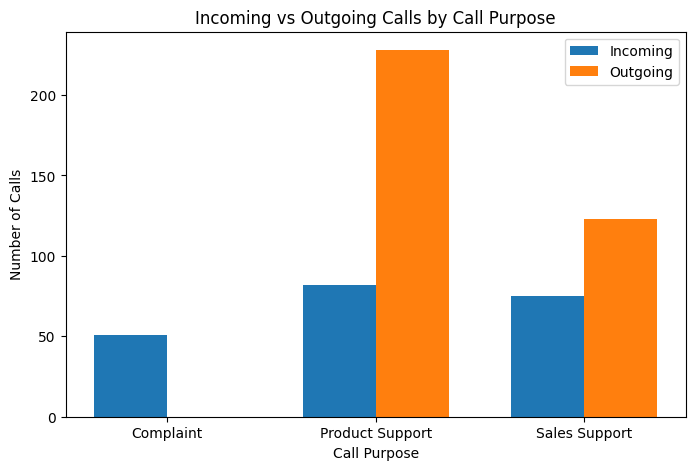

In [61]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:

purposes = ["Complaint", "Product Support", "Sales Support"]

incoming = [
    complaints.get("Incoming", 0),
    product_support.get("Incoming", 0),
    sales_support.get("Incoming", 0)
]

outgoing = [
    complaints.get("Outgoing", 0),
    product_support.get("Outgoing", 0),
    sales_support.get("Outgoing", 0)
]

x = np.arange(len(purposes))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, incoming, width, label="Incoming")
plt.bar(x + width/2, outgoing, width, label="Outgoing")

plt.xticks(x, purposes)
plt.ylabel("Number of Calls")
plt.xlabel("Call Purpose")
plt.title("Incoming vs Outgoing Calls by Call Purpose")
plt.legend()

##### Record your answer below:

> Chart style you chose and why: A grouped bar chart was choosen because it allows for a clear comparison of incoming vs outgoing call volume across different call purposes.

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: 

The South branch appears to be operating more efficiently overall. This branch demonstrates a lower avg abandonment rate and higher service level percentage which reflects stronger queue management and more effective call-handling process. 

While both branches show comparable peformance in avaergae speed of answer, South branch consistently performs better across KPIs.

#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: 

North branch would benefit from the help the most. Its KPIs indicate higher operational strain. While average speed of answer suggests that North branch representatives are working efficiently, the volume of incoming calls relative to staffing levels appears to exceed their capacity. 

Therefore, allocating the additional representatives to the North branch would provide the greatest improvement.

#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: 

 While the dataset provided is sufficient, having data on call durations and issue resolution outcomes would be of most benefit. This information would have helped determine whether longer wait times and higher abandonment rates are driven by the nature of calls themselves. 

 Additionally, customer satification metrics like post-call survey results would help connect operational performance metrics to actual customer experience outcomes. 

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

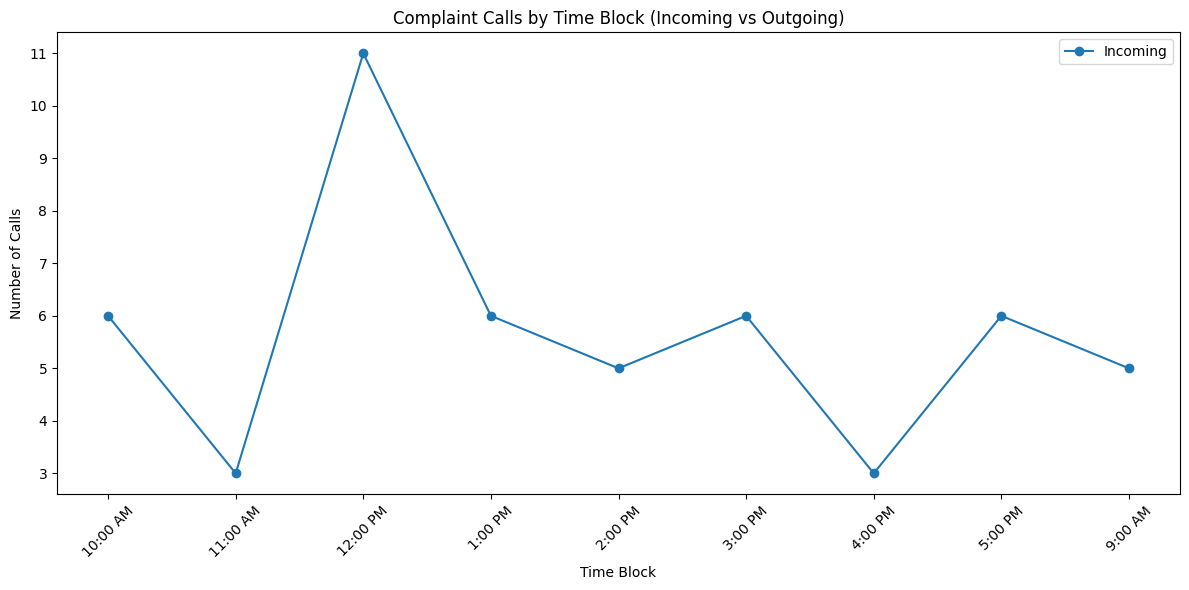

In [66]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:
call_volume = (
    df
    .groupby(["Time Block", "Call Purpose", "Incoming or Outgoing"])["Calls"]
    .sum()
    .reset_index()
)

call_volume.head()

# Use groupby and get_group to select which call purpose to plot:
purpose_groups = call_volume.groupby("Call Purpose")

# Plot
complaint_calls = purpose_groups.get_group("Complaint")

plt.figure(figsize=(12, 6))

for direction in complaint_calls["Incoming or Outgoing"].unique():
    subset = complaint_calls[complaint_calls["Incoming or Outgoing"] == direction]
    plt.plot(
        subset["Time Block"],
        subset["Calls"],
        marker="o",
        label=direction
    )

plt.title("Complaint Calls by Time Block (Incoming vs Outgoing)")
plt.xlabel("Time Block")
plt.ylabel("Number of Calls")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()